<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2025<br>
<font color=3C99D size=5>
Practical Assignment 1 - Search <br>
<font color=696880 size=4>
Sadegh Mohammadian

____________

# Personal Data

In [1]:
student_number = 402104499  
Name = "Mahdi"
Last_Name = "Mansouri"

# Rules
- Make sure that all of your cells can be run perfectly.
-Do not change the Parts which are not marked with #TODO
-Complete the functions or parts that are marked with #TODO
-Feel free to add functions if you need!.

# Search Algorithms
This notebook will guide you through the implementation of various search algorithms applied to a maze problem:
1. Depth-First Search (DFS)(10 points)
2. Breadth-First Search (BFS)(10 points)
3. A* Search(10 points)
4. Hill Climbing(25 points)
5. Genetic Algorithm(60points)

## Libraries

In [176]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import math
import random
import copy

Let's define a simple maze structure to work with.

In [8]:
####################### Do not change ##############################
class Maze:
    def __init__(self, grid):
        self.grid = grid
        self.start = None
        self.goal = None

    def set_start(self, position):
        self.start = position

    def set_goal(self, position):
        self.goal = position

    def get_neighbors(self, position):
        neighbors = []
        x, y = position
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(self.grid) and 0 <= ny < len(self.grid[0]) and self.grid[nx][ny] == 0:
                neighbors.append((nx, ny))
        return neighbors

    def visualize(self, path=[]):
        maze_copy = np.array(self.grid)
        for (x, y) in path:
            maze_copy[x][y] = 2  # Mark path
        plt.figure(figsize=(10, 10))
        plt.imshow(maze_copy, cmap="coolwarm")
        # Draw path by connecting the centers of squares
        
        if path:
            x_coords = [y  for (x, y) in path]
            y_coords = [x  for (x, y) in path]
            plt.plot(x_coords, y_coords, color="yellow", linewidth=2)
        if self.start:
            plt.scatter(self.start[1], self.start[0], color='black', s=100, label='Pacman')  # Pacman start
        if self.goal:
            plt.scatter(self.goal[1], self.goal[0], color='pink', s=100, label='Food')  # Food
        
        plt.xticks([])
        plt.yticks([])
        plt.show()
####################### Do not change ##############################

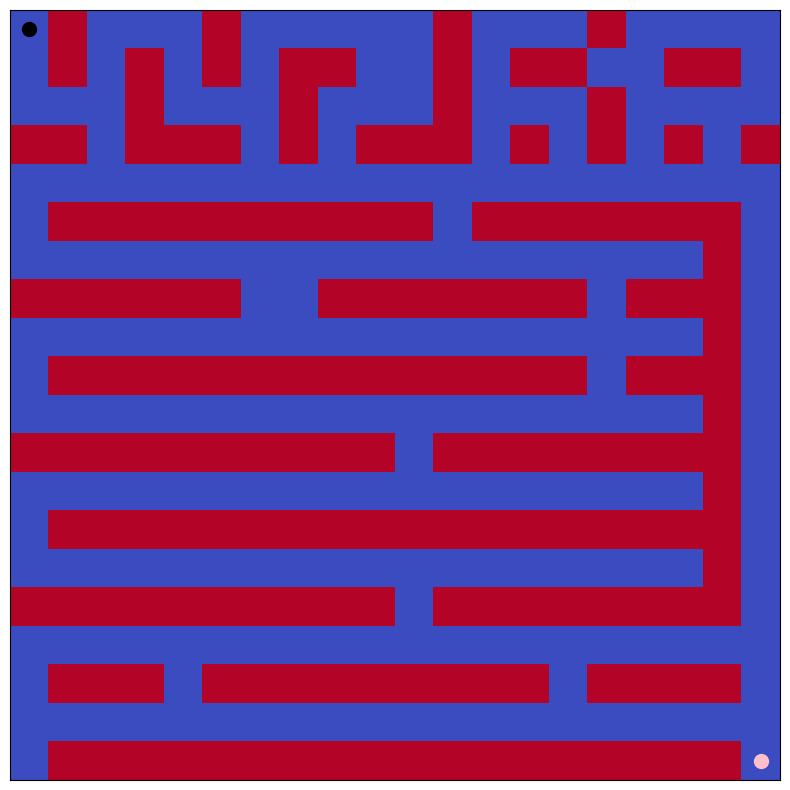

In [9]:

####################### Do not change ####################################
maze_grid = [
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
]

maze = Maze(maze_grid)
maze.set_start((0, 0))
maze.set_goal((19, 19))
maze.visualize()
####################### Do not change ####################################

In [ ]:
maze.get_neighbors((2,0))

[(1, 0), (2, 1)]

In [10]:
def dfs(maze, start, goal, path=None, visited=None):
# TODO
    #if expanded is None:
    #    expanded = 0
    if path is None:
        path=[]
    if visited==None:
        visited=set()
    path.append(start)
    visited.add(start)
    #expanded +=1
    if start == goal:
        return path,len(visited)
    
    #found_sol = False
    for i in maze.get_neighbors(start):
        if i not in visited:
            p,e = dfs(maze,i,goal,path,visited)
            if e!=-1:
                return p,e
            else:
                path.pop()
    return None,-1

DFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (1, 6), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (2, 8), (3, 8), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (7, 6), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (8, 0), (9, 0), (10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (11, 10), (12, 10), (12, 9), (12, 8), (12, 7), (12, 6), (12, 5), (12, 4), (12, 3), (12, 2), (12, 1), (12, 0), (13, 0), (14, 0), (14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (14, 6), (14, 7), (14, 8), (14, 9), (14, 10), (15, 10), (16, 10), (16, 9), (16, 8), (16, 7), (16, 6), (16, 5), (16, 4), (17, 4), (18, 4), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (18, 12), (18, 13), (18, 14), (17, 14), (16, 14), (16, 15), (16, 16), (16, 17), (16, 18), (16, 19), (17, 19), (18, 19), (19, 19)]

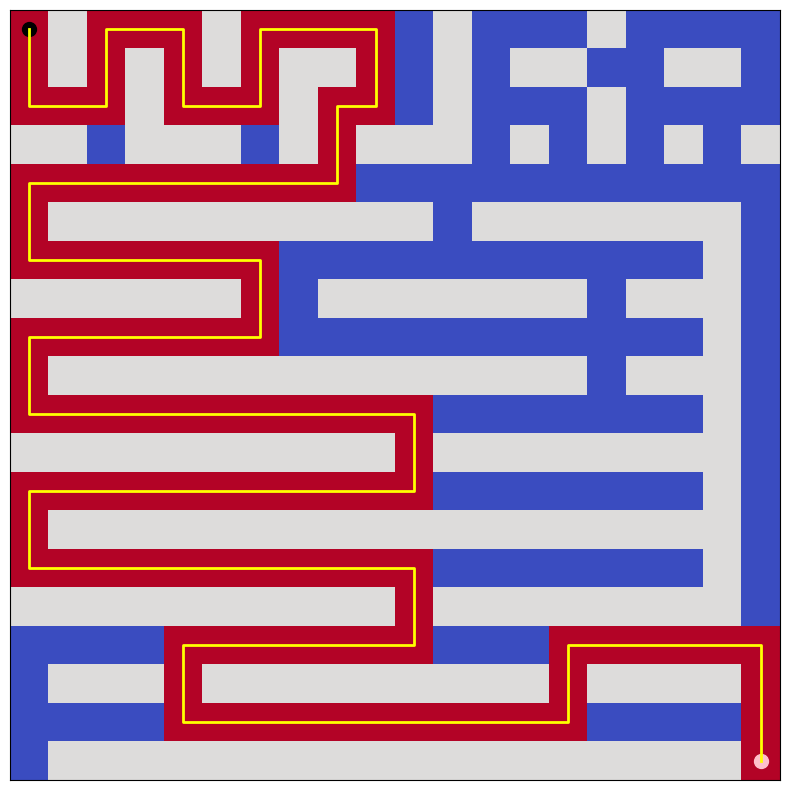

In [11]:
# Test DFS
result_dfs, expanded_nodes_dfs = dfs(maze, maze.start, maze.goal)
print("DFS Path:", result_dfs)
print("DFS Expanded Nodes:", expanded_nodes_dfs)
maze.visualize(result_dfs)

In [12]:
import copy


def bfs(maze, start, goal):
# TODO
    visited=set()
    q=deque()
    expanded=0
    q.append((start, [start]))
    visited.add(start)
    while len(q) != 0:
        node,p = q.popleft()
        if node == goal:
            #p.append(goal)
            return p,expanded
        expanded +=1
        for i in maze.get_neighbors(node):
            if i not in visited:
                p1=p+[i]
                q.append((i,p1))
                visited.add(i)
    return None,expanded

BFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 19), (6, 19), (7, 19), (8, 19), (9, 19), (10, 19), (11, 19), (12, 19), (13, 19), (14, 19), (15, 19), (16, 19), (17, 19), (18, 19), (19, 19)]
BFS Expanded Nodes: 160


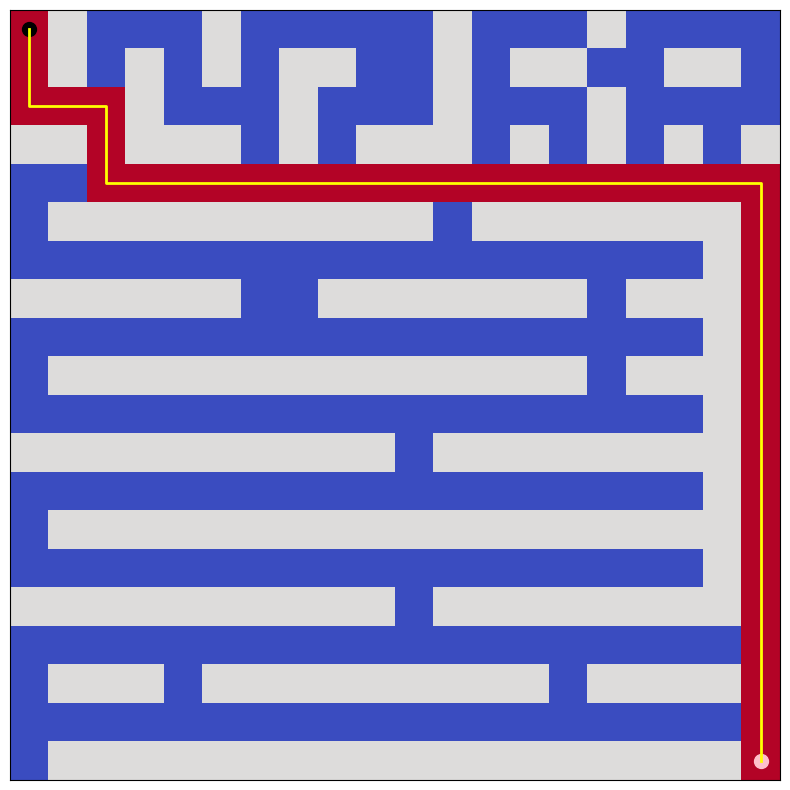

In [13]:
# Test BFS with expanded nodes
result_bfs, expanded_nodes_bfs = bfs(maze, maze.start, maze.goal)
print("BFS Path:", result_bfs)
print("BFS Expanded Nodes:", expanded_nodes_bfs)
maze.visualize(result_bfs)

In [14]:
import heapq
from math import sqrt
def heuristic(a, b): # a and b are two places in maze
    a1,a2=a
    b1,b2=b
    a1=(a1-b1)*(a1-b1)
    a2=(a2-b2)*(a2-b2)
    return sqrt(a1+a2)

def a_star(maze, start, goal):
    # TODO
    visited=set()
    q=[]
    expanded=0
    f=heuristic(start,goal)
    q.append((f,start, [start]))
    heapq.heapify(q)
    visited.add(start)
    while len(q) != 0:
        fprime,node,p = heapq.heappop(q)
        if node == goal:
            return p,expanded
        expanded +=1
        for i in maze.get_neighbors(node):
            if i not in visited:
                p1=p+[i]
                heapq.heappush(q,(heuristic(i,goal)+len(p1)-1,i,p1))
                #q.append((heuristic(i,goal)+len(p1)-1,i,p1))
                visited.add(i)
    return None,expanded


A* Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 19), (6, 19), (7, 19), (8, 19), (9, 19), (10, 19), (11, 19), (12, 19), (13, 19), (14, 19), (15, 19), (16, 19), (17, 19), (18, 19), (19, 19)]
A* Expanded Nodes: 107


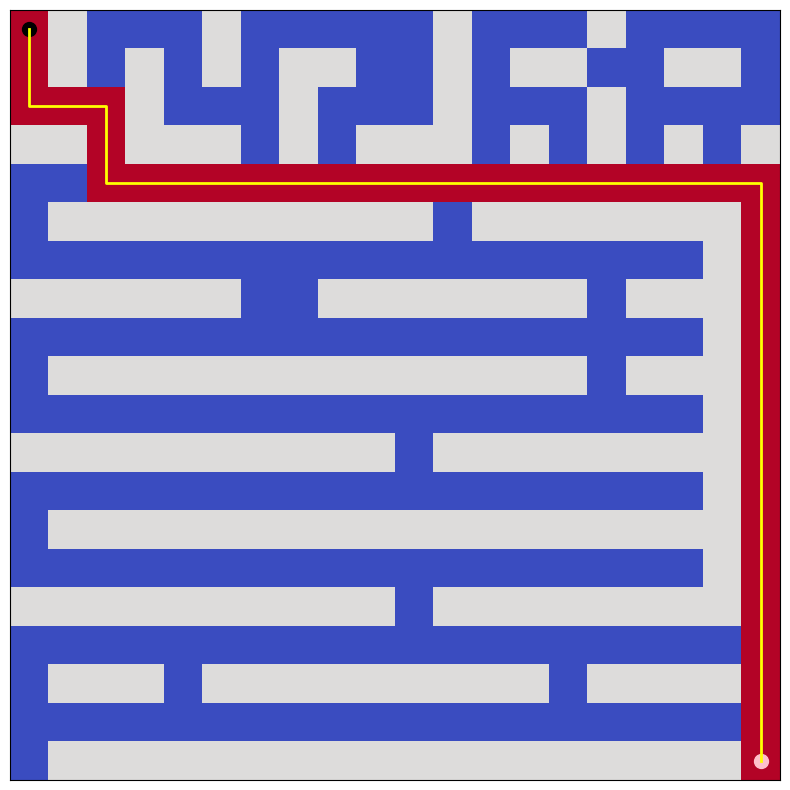

In [15]:
# Test A* with expanded nodes
result_a_star, expanded_nodes_a_star = a_star(maze, maze.start, maze.goal)
print("A* Path:", result_a_star)
print("A* Expanded Nodes:", expanded_nodes_a_star)
maze.visualize(result_a_star)

Question:

Explain about your heurustic function and why did you choose it?

از فاصله اقلیدسی استفاده کردم. چون هم حساب کردن آن راحت است و هم این تابع هیورسیتیک هم قابل قبول است و هم سازگار

In [16]:
def heuristic(a, b): # a and b are two places in maze
    a1,a2=a
    b1,b2=b
    a1=(a1-b1)*(a1-b1)
    a2=(a2-b2)*(a2-b2)
    return sqrt(a1+a2)

def hill_climbing(maze, start, goal):
    # TODO
    path=[]
    visited = set()
    visited.add(start)
    path.append(start)
    min=heuristic(start,goal)
    while(True):
        candid=0
        for i in maze.get_neighbors(path[len(path)-1]):
            if i not in visited:
                if heuristic(i,goal) < min:
                    candid=i
                    min=heuristic(i,goal)
        if heuristic(path[len(path)-1],goal) == min:
            break
        else:
            path.append(candid)
    return path

Hill Climbing Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 11), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (10, 16), (10, 17)]


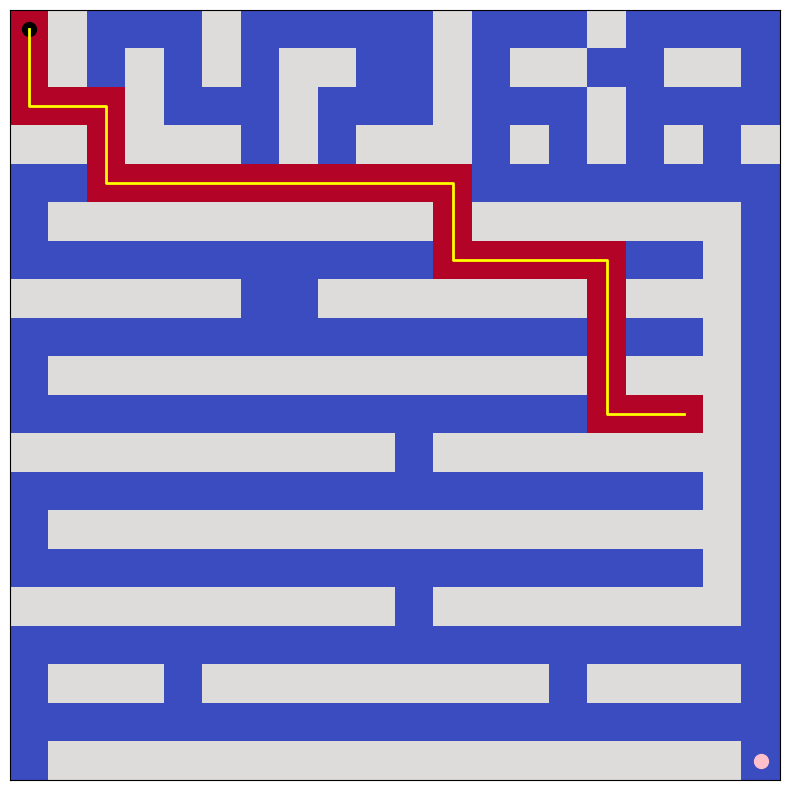

In [17]:
# Test Hill Climbing
result_hill_climbing = hill_climbing(maze, maze.start, maze.goal)
print("Hill Climbing Path:", result_hill_climbing)
maze.visualize(result_hill_climbing)

now implement the hill climbing algorithm with random moves and restarts

In [65]:
from math import inf


def hill_climbing_with_restart_random_move(maze, start, goal, max_restarts=20,p=0.1):
    patih=[start]
    for _ in range(max_restarts):
        path=[start]
        while(True):
            sample = np.random.binomial(n=1,p=p)
            if sample == 1:
                temp = maze.get_neighbors(path[-1])
                intali=random.randint(0,len(temp)-1)
                path.append(temp[intali])
            else:
                min=inf
                candid=0
                for i in maze.get_neighbors(path[-1]):
                    if heuristic(i,goal) < min:
                        candid=i
                        min=heuristic(i,goal)
                if heuristic(path[-1],goal) < min:
                    break
                else:
                    path.append(candid)
    if heuristic(path[-1],goal) < heuristic(patih[-1],goal):
        patih=path

    return patih 


Hill Climbing with Restart Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 5), (4, 4), (4, 5), (4, 6), (3, 6), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 19), (6, 19), (7, 19), (6, 19), (7, 19), (8, 19), (9, 19), (8, 19), (9, 19), (10, 19), (11, 19), (12, 19), (13, 19), (14, 19), (15, 19), (16, 19), (15, 19), (16, 19), (17, 19), (16, 19), (17, 19), (18, 19), (19, 19)]


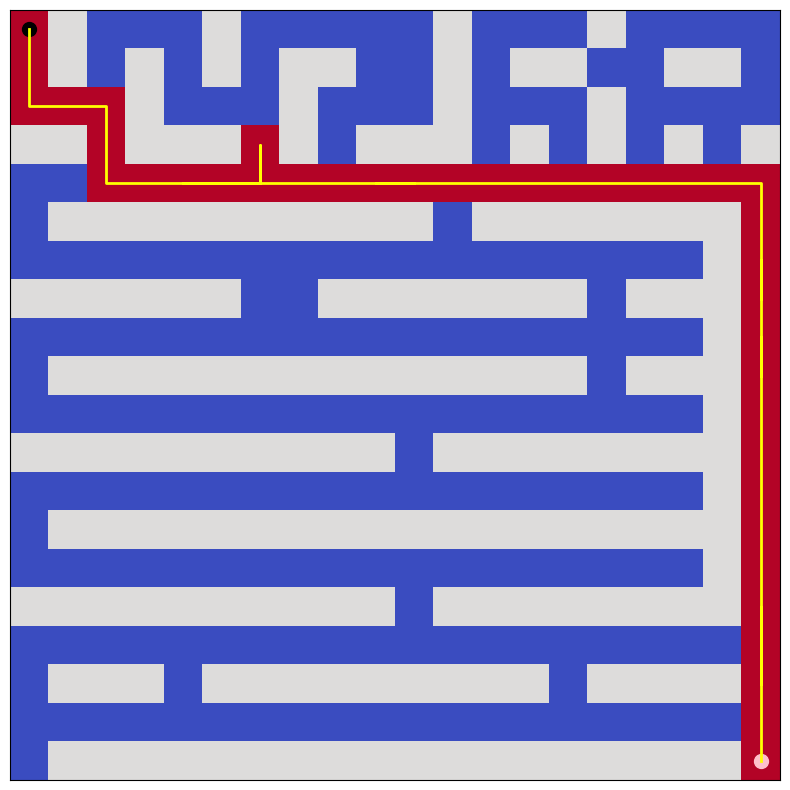

In [70]:
# Test Hill Climbing with Restart
result_hc_restart = hill_climbing_with_restart_random_move(maze, maze.start, maze.goal,p=0.2)
print("Hill Climbing with Restart Path:", result_hc_restart)
maze.visualize(result_hc_restart)

Question:

Explain your heuristic and observation's result. Also, compare the A* method with Uninformed search and hill climbing in the context of the Maze problem.

از هیوریستیک یا آبجکتیو فانکشن- فاصله تا گل- استفاده کردم. هر از گاهی هم به سمت جایی غیر از جای بهینه حرکت میکنم تا شانس خروج از لوکال مینیمم غیر گلوبال مینیمم داشته باشم.

فرق بین آستار و آن‌اینفورمد سرچ هم در تعداد نود هایی که باز می‌شود مشهود است چون آستار انگار یک اطلاعات بیشتر و بهتر ارائه میدهد

# Part2 (Global minimum and Local minimum!)

in this part we want to find global minimum of function $f(x)$ in $[-2,2]$ with hill_climbing algorithm with random moves and restarts,our starting point is x=0.4:

$$f(x) = sin(3x) + 0.3x^2 - 0.7x ,    x \in [-2,2]$$

In [3]:
def f(x):
    return np.sin(3*x) + 0.3*x**2 - 0.7*x

complete `hill_climbing_1D_random` and run the code for 10 times and visualize the results with subplots

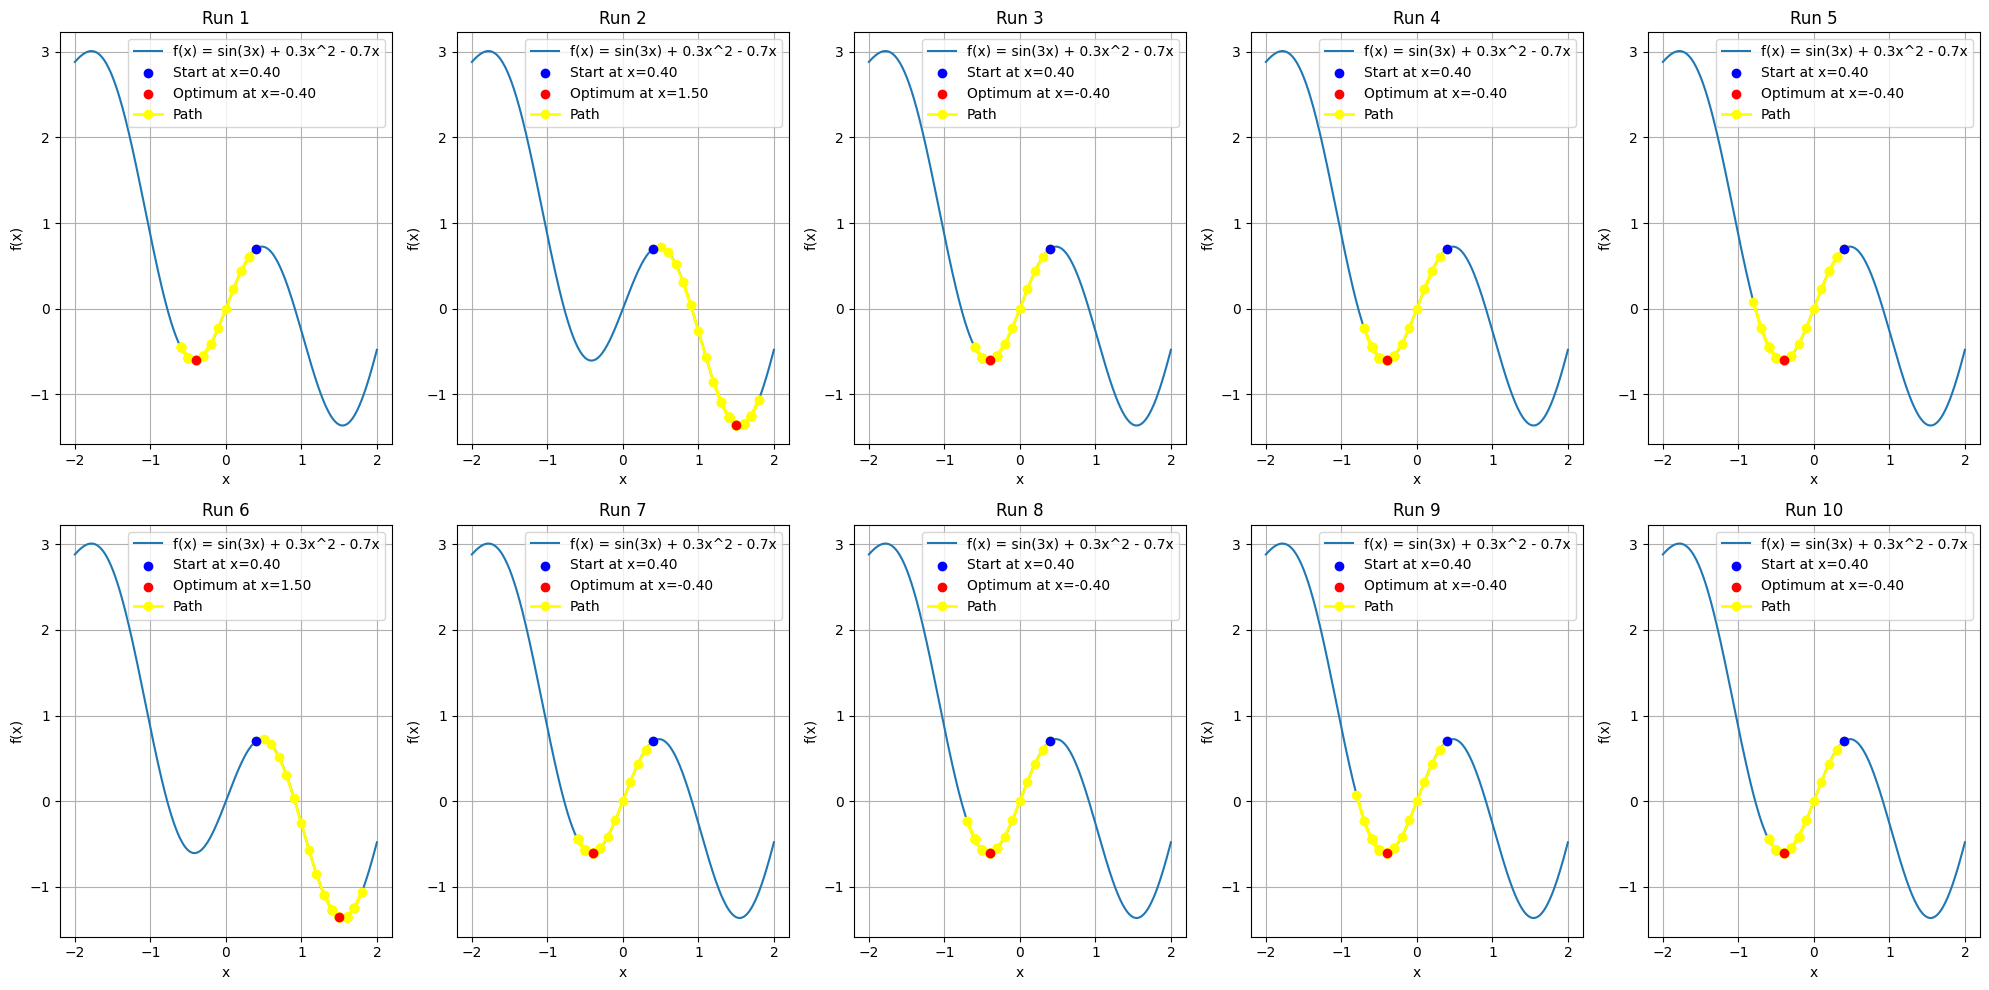

In [8]:
def hill_climbing_1D_random(f, x_start, step_size=0.1, max_iters=100, p=0.2):
    path=[x_start]
    x=x_start
    for _ in range(max_iters):
            sample = np.random.binomial(n=1,p=p)
            if sample ==1:
                move=np.random.binomial(n=1,p=0.5)
                if move ==0:
                    s=path[-1]-0.1
                    path.append(s)
                else:
                    s=path[-1]+0.1
                    path.append(s)
                if f(path[-1]) < f(x):
                    x=path[-1]
            else:
                x1,x2=path[-1]-0.1,path[-1]+0.1
                if(f(x1)<f(x2)):
                    path.append(x1)
                    if f(x1)<f(x):
                        x=x1
                else:
                    path.append(x2)
                    if f(x2)<f(x):
                        x=x2
    return x, f(x), path


fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()


x_start = 0.4 # Do not change!
for i in range(10):
    x_vals = np.linspace(-2, 2, 400)
    y_vals = f(x_vals)
    x_opt, y_opt, path = hill_climbing_1D_random(f, x_start=x_start)
    axes[i].plot(x_vals, y_vals, label='f(x) = sin(3x) + 0.3x^2 - 0.7x')
    axes[i].scatter(x_start, f(x_start), color='blue', zorder=3, label=f'Start at x={x_start:.2f}')
    axes[i].scatter(x_opt, y_opt, color='red', zorder=3, label=f'Optimum at x={x_opt:.2f}')
    axes[i].plot(path, [f(x) for x in path], marker='o', color='yellow', linestyle='-', linewidth=2, label='Path')
    
    
    
    axes[i].legend()
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('f(x)')
    axes[i].set_title(f'Run {i+1}')
    axes[i].grid()

plt.tight_layout()
plt.show()

Question:

Explain the results.

بخاطر اینکه نقطه شروع ما در جایی است که وقتی از گرادیان دیسنت استفاده میکنیم، به نقطه لوکال مینیمم میرسیم که گلوبال مینیمم نیست. پس به همین دلیل باید از رندومیزیشن استفاده کنیم تا اقلا شانسی برای رفتن به سمت جایی غیر از مسیر گرادیان دیسنت باشد. همانطور که دیده میشود، اکثر اوقات هم به سمت گلوبال مینیمم حرکت نمیکند.

# Part2 (Genetic Algorithm)

In this part we want to Solve TSP problem with Genetic algorithm.

We solve the problem by considering an initial order for visiting the cities. Then, we use a genetic algorithm to find an optimal order.


![TSP GIF](tsp-gif.gif.mp4)


first read the list of cities and their cordinates from TSP51.txt file

In [9]:
# get cities info
def getCity():
    cities = []
    filename="TSP51.txt"
    with open(filename, "r") as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 3:
                z, x, y = map(int, parts) 
                cities.append((z, x, y))

    return cities

Now complete code below to calculates the total travel distance for a given sequence of cities in a Traveling Salesman Problem (TSP) scenario using Euclidean distance formula :

$$ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

In [10]:
# calculating distance of the cities
def calcDistance(cities):
    total_sum = 0
    # TODO
    for i in range(len(cities)):
        _,a1,a2=cities[i-1]
        _,b1,b2=cities[i]
        total_sum+=math.sqrt((a1-b1)**2 + (a2-b2)**2)
    return total_sum

  
We need to generate `size` random routes by **shuffling** the list of cities. For each route, **calculate its total distance** using `calcDistance()` and store it in the `population` list as `[distance, route]`. Finally, sort the population to find the shortest route.


In [11]:
# selecting the population
def selectPopulation(cities, size):
    population = []
    for _ in range(size):
        shuffled_cities = cities[:]
        random.shuffle(shuffled_cities)
        population.append((calcDistance(shuffled_cities), shuffled_cities))
    population.sort(key=lambda x: x[0])
    return population, population[0]


Finally,Implement the **Genetic Algorithm** to evolve a population toward an optimal solution.  

1. **Elitism:** Preserve the top two best solutions from the current population.  
2. **Selection:** Use **tournament selection** to choose parents for crossover.  
3. **Crossover:** Swap genetic material between parents with a probability of `CROSSOVER_RATE`.  
4. **Mutation:** Randomly swap genes in offspring with a probability of `MUTATION_RATE`.  
5. **Repeat for `ITERATION` generations** until the best solution meets `TARGET`.  

Track the **generation count** and periodically print the best solution. 

In [190]:
# the genetic algorithm
def makechildren(population,MUTATION_RATE,popsize):
    par_list=sorted(random.sample(range(math.ceil(popsize*0.5+popsize*0.5/20)), math.ceil(popsize*0.5)))
    for i in range(math.ceil(popsize*0.5)):
        p1=population[par_list[i-1]][1]
        p2=population[par_list[i]][1]
        size = len(p1)
        while True:
            if random.random() < 0.5:
                p1,p2=p2,p1
            start, end = sorted(random.sample(range(size), 2))
            child = [None] * size
            child[start:end] = p1[start:end]
            ptr = end
            p2_ptr = end  
        
            while None in child:
                city = p2[p2_ptr % size]
                if city not in child:
                    child[ptr % size] = city
                    ptr += 1
                p2_ptr += 1
            if calcDistance(child)<min(calcDistance(p1),calcDistance(p2))+min(calcDistance(p1)/50,calcDistance(p2)/50):
                break
        child = [None] * size
        child[start:end] = p1[start:end]
        ptr = end
        p2_ptr = end  
        
        while None in child:
            city = p2[p2_ptr % size]
            if city not in child:
                child[ptr % size] = city
                ptr += 1
            p2_ptr += 1
        dissss=calcDistance(child)
        dissss+=min(calcDistance(p1)/100,calcDistance(p2)/100)
        if random.random() < MUTATION_RATE:
            while(True):
                newchild=child[:]
                for _ in range(1):
                    i, j = random.sample(range(len(child)), 2)
                    newchild[i], newchild[j] = newchild[j], newchild[i]
                if calcDistance(newchild) < dissss:
                    dissss=calcDistance(newchild)
                    child=newchild
                    break
        population.append((dissss,child))
    population.sort(key=lambda x: x[0])
    if len(population) > popsize*10:  
        for _ in range(math.ceil(popsize*0.5)):
            population.pop()
    
def geneticAlgorithm(
    population,
    lenCities,
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
    TARGET,
    ITERATION=200
):
    
    popsize=len(population)
        
    gen_number = 0
    for i in range(ITERATION):
        population.sort(key=lambda x: x[0])
        random_number = random.random()
        if random_number < CROSSOVER_RATE:
            makechildren(population,MUTATION_RATE,popsize)
                
        gen_number+=1

        if gen_number % 10 ==0:
            print(gen_number, sorted(population)[0][0])

        if sorted(population)[0][0] < TARGET:
            break
    answer = sorted(population)[0]


    return answer, gen_number

###Because of randomness, my answer will vary from 580 to 460

In [156]:
# draw cities and answer map
##################### Do not change ###########################
def drawMap(city, answer):
    for j in city:
        plt.plot(j[1], j[2], "ro")
        plt.annotate(j[0], (j[1], j[2]))

    for i in range(len(answer[1])):
        try:
            first = answer[1][i]
            secend = answer[1][i + 1]

            plt.plot([first[1], secend[1]], [first[2], secend[2]], "gray")
        except:
            continue

    first = answer[1][0]
    secend = answer[1][-1]
    plt.plot([first[1], secend[1]], [first[2], secend[2]], "gray")

    plt.show()
##################### Do not change ###########################

10 1058.5841685843234
20 837.1697816214695
30 699.1294700189615
40 609.6302719236774
50 486.5076955017933
60 457.0330010301961
--------------------------------------------------
Generation: 66
Fittest chromosome distance before training: 1349.1654180953276
Fittest chromosome distance after training: 448.40409228832453
Target distance: 450.0
--------------------------------------------------


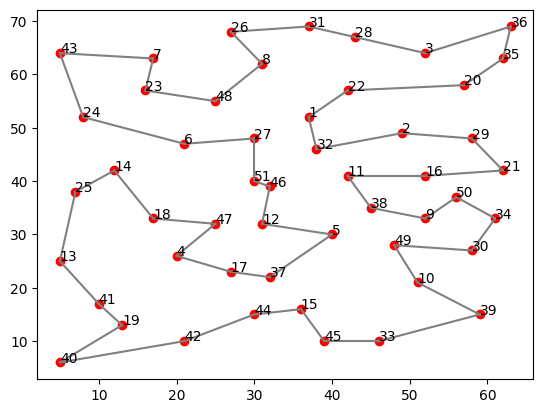

In [191]:
##################### Do not change ###########################
# initial values
POPULATION_SIZE = 2000
TOURNAMENT_SELECTION_SIZE = 4
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.9
TARGET = 450.0

cities = getCity()
firstPopulation, firstFitest = selectPopulation(cities, POPULATION_SIZE)
answer, genNumber = geneticAlgorithm(
    firstPopulation,
    len(cities),
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
    TARGET,
)

print(50*"-")
print("Generation: " + str(genNumber))
print("Fittest chromosome distance before training: " + str(firstFitest[0]))
print("Fittest chromosome distance after training: " + str(answer[0]))
print("Target distance: " + str(TARGET))
print(50*"-")

drawMap(cities, answer)
##################### Do not change ###########################